In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('covid_symptoms.csv')

In [ ]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


**Data Cleaining and Pre Processing**

In [ ]:
df.shape

(211429, 9)

In [ ]:
df.isna().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [ ]:
df = df.dropna()   #deleting null valued rows

In [ ]:
df.shape

(206058, 9)

In [ ]:
df.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [ ]:
df.dtypes

cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result          float64
age_60_and_above        object
gender                  object
test_indication         object
dtype: object

**Converting categorial data into numerical data**

In [ ]:
#age_60_and_above
df = df.replace(to_replace = 'No', value = 0.0)
df = df.replace(to_replace = 'Yes', value = 1.0)

#gender
df = df.replace(to_replace = 'Female', value = 0.0)
df = df.replace(to_replace = 'Male', value = 1.0)

#test_indication
df = df.replace(to_replace = 'Abroad', value = 0.0)
df = df.replace(to_replace = 'Contact with confirmed', value = 1.0)
df = df.replace(to_replace = 'Other', value = 2.0)

In [ ]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df['corona_result'].value_counts()

corona_result
1.0    107472
0.0     98586
Name: count, dtype: int64

<Axes: >

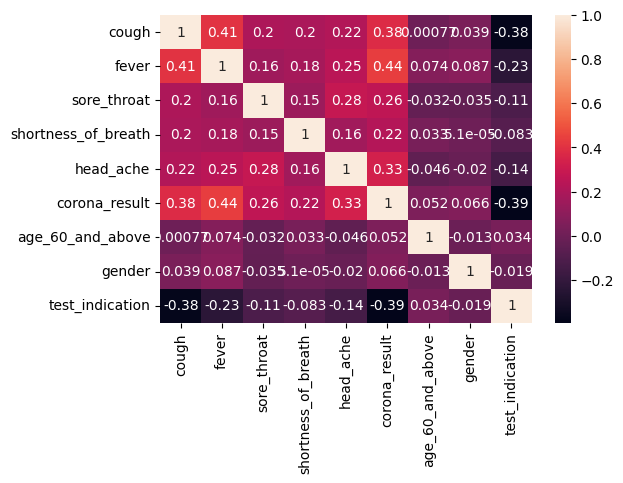

In [ ]:
plt.figure(figsize=(6,4))
c=df.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)


**Model Training**

In [ ]:
features = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication']

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.75)

In [ ]:
X_train = train[features]
Y_train = train['corona_result']

X_test = test[features]
Y_test = test['corona_result']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
model.score(X_test, Y_test)

0.8600601766475784

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[1. 1. 0. ... 0. 1. 0.]


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[22445,  2237],
       [ 4972, 21861]])

Text(33.22222222222222, 0.5, 'real')

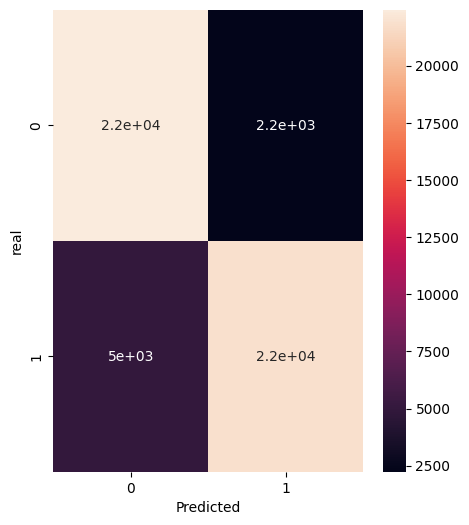

In [ ]:
plt.figure(figsize =(5,6))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  86.01 %,  44306.0 correct detections
Inaccuracy:  13.99 %,  7209.0 Incorrect detections


In [ ]:
df.loc[5]

cough                  1.0
fever                  1.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          1.0
age_60_and_above       1.0
gender                 1.0
test_indication        1.0
Name: 5, dtype: float64

In [ ]:
input_data = (1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [1]:
  print("Corona positive")
else:
  print("corona negitive")

Corona positive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'Covid-19.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
for columns in df.columns:
  print(columns)

cough
fever
sore_throat
shortness_of_breath
head_ache
corona_result
age_60_and_above
gender
test_indication
